In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from pprint import pprint


In [2]:
df = pd.read_csv("FinalBalancedDataset.csv")


In [3]:
df.shape

(56745, 3)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


In [88]:

#----------------------------------------Bag of words-------------------------------------------------------------
#----------------------------------------------------------------------------------------------------


x_train, x_test, y_train, y_test = train_test_split(df.tweet, df.Toxicity, test_size=0.2,random_state=42)

v = CountVectorizer()

x_train_cv = v.fit_transform(x_train.values)
x_test_cv = v.transform(x_test)


In [77]:

#----------------------------------------TF-IDF-------------------------------------------------------------
#----------------------------------------------------------------------------------------------------


x_train_tdf, x_test_tdf, y_train_tdf, y_test_tdf = train_test_split(df.tweet, df.Toxicity, test_size=0.2,random_state=42)

TF = TfidfVectorizer()

x_train_tf = TF.fit_transform(x_train_tdf.values)
x_test_tf = TF.transform(x_test_tdf)


In [12]:
print(TF.vocabulary_)

{'8220': 1942, 'ac_hussle': 2797, '98': 2080, 'of': 37164, 'women': 56309, 'were': 55441, 'sluts': 46705, 'freshman': 20060, 'year': 57197, 'college': 11864, '8221': 1943, 'let': 30145, 'these': 50904, 'hoes': 24024, 'be': 6369, 'great': 22159, 'kip': 28942, 'tokuda': 51670, 'yellow': 57248, 'guy': 22594, 'working': 56454, 'to': 51596, 'niggerize': 36125, 'the': 50478, 'seattle': 44973, 'pd': 38818, 'died': 14957, 'too': 51778, 'bad': 5747, 'there': 50845, 'another': 4416, 'pos': 40192, 'hiding': 23748, 'in': 25626, 'wings': 56075, 'replace': 42762, 'him': 23854, 'laugh': 29760, 'amp': 4117, 'positips': 40204, 'plusfactorph': 39838, 'sis': 46312, 'said': 44173, 'go': 21561, 'sleep': 46567, 'bitch': 7441, 'it': 26589, 'our': 37963, 'day': 14031, 'ain': 3393, 'sleeping': 46571, '128540': 508, 'no': 36312, 'don': 15659, 'wish': 56140, 'did': 14942, 'though': 51155, 'nehabhasin': 35587, 'madhaniya': 31918, '14th': 635, 'june': 27960, 'just': 28009, 'days': 14063, 'staytuned': 48105, 'lates

In [56]:
a = TF.get_feature_names_out()
for i in a:
    index = TF.vocabulary_.get(i)
    score = TF.idf_[index]

    print(f"{i} : {score}")

00 : 7.811178297122806
000 : 8.059639656421307
0000000000000 : 11.030054121991007
000001 : 10.624589013882842
001 : 11.030054121991007
003 : 11.030054121991007
007 : 11.030054121991007
007beardownjedi : 11.030054121991007
007hertzrumble : 11.030054121991007
007m_h : 11.030054121991007
0099 : 11.030054121991007
00_jackie : 10.624589013882842
00am : 10.624589013882842
00h30 : 11.030054121991007
00pm : 10.624589013882842
00sexilexi00 : 9.77729115349564
01 : 9.77729115349564
0115 : 11.030054121991007
0124jessi : 10.624589013882842
012llzcmsu : 11.030054121991007
01926889917 : 11.030054121991007
02 : 9.77729115349564
0221 : 8.889987958494736
0266808099 : 11.030054121991007
02e1ceoe3z : 11.030054121991007
03 : 11.030054121991007
0300 : 11.030054121991007
030916 : 11.030054121991007
03111880779 : 11.030054121991007
033 : 11.030054121991007
0345 : 11.030054121991007
039 : 9.931441833322898
03as6bgqec : 11.030054121991007
03otpzxcbi : 11.030054121991007
03pgoqqjys : 11.030054121991007
03s8desez

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      6561
           1       1.00      0.52      0.68      4788

    accuracy                           0.80     11349
   macro avg       0.87      0.76      0.77     11349
weighted avg       0.85      0.80      0.78     11349

Confusion Matrix:
[[6549   12]
 [2288 2500]]


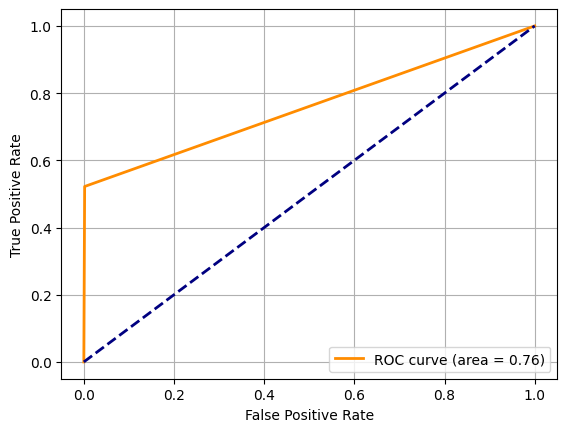

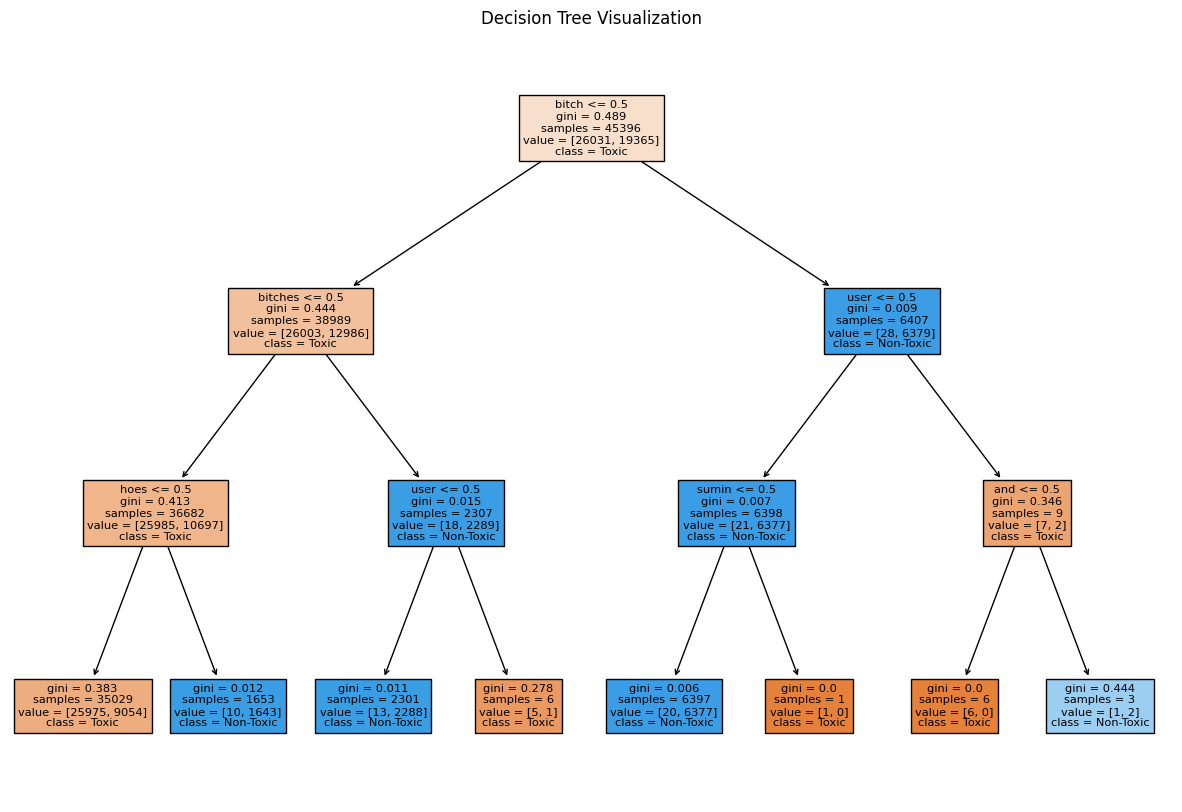

In [79]:
#------------------------------------------------DecisionTree ( for bag of words)  ----------------------------------------------------------------------------------

from sklearn.tree import DecisionTreeClassifier, plot_tree

DT_model = DecisionTreeClassifier(max_depth=3)
DT_model.fit(x_train_cv,y_train)

x_test_cv = v.transform(x_test)
y_pred = DT_model.predict(x_test_cv)


#------------------------------------------Metrics----------------------------------------------------------------------------------

print(classification_report(y_test,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

fpr,tpr,_= roc_curve(y_test,y_pred) 
roc_auc = auc(fpr,tpr)

#----------------------------------------Roc Curve------------------------------------------------------------------------------
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange',lw = 2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#----------------------------------------------Tree-----------------------------------------------------------------
plt.figure(figsize=(15, 10))
plot_tree(DT_model, filled=True, feature_names=v.get_feature_names_out(),class_names=["Toxic","Non-Toxic"])
plt.title("Decision Tree Visualization")
plt.show()


              precision    recall  f1-score   support

           0       0.75      0.97      0.85      6472
           1       0.94      0.57      0.71      4877

    accuracy                           0.80     11349
   macro avg       0.85      0.77      0.78     11349
weighted avg       0.83      0.80      0.79     11349

Confusion Matrix:
[[6300  172]
 [2094 2783]]


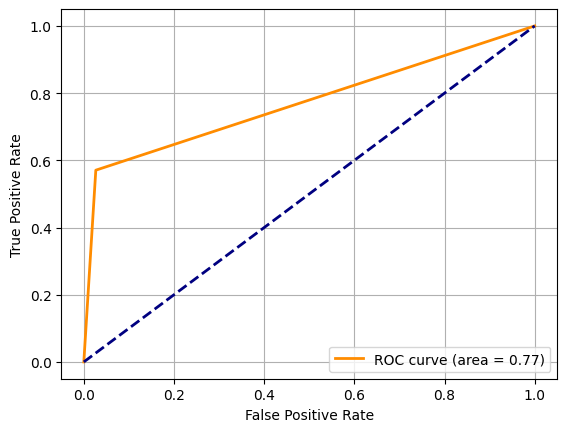

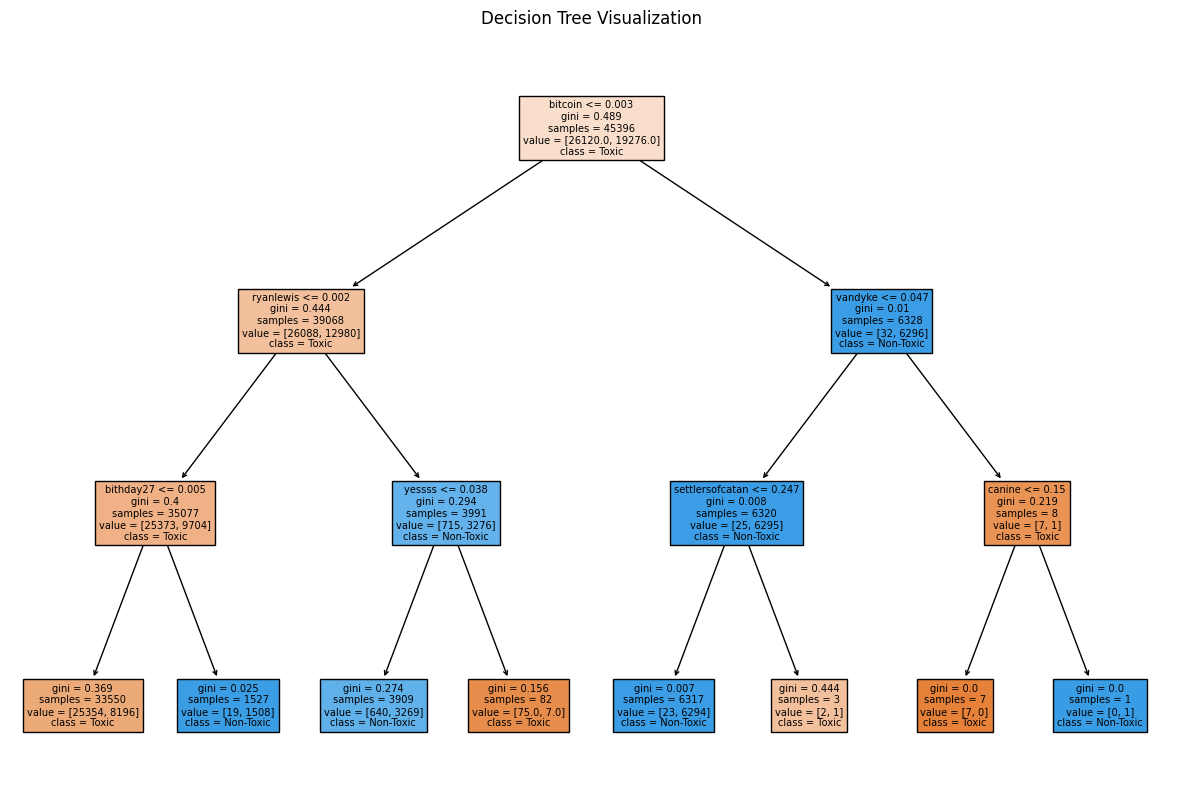

In [80]:
#------------------------------------------------ DecisionTree (For TF - IDF )  ----------------------------------------------------------------------------------

from sklearn.tree import DecisionTreeClassifier, plot_tree

DT_model = DecisionTreeClassifier(max_depth=3)
DT_model.fit(x_train_tf,y_train_tdf)

y_pred = DT_model.predict(x_test_tf)


#------------------------------------------Metrics----------------------------------------------------------------------------------

print(classification_report(y_test_tdf,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_tdf, y_pred))

fpr,tpr,_= roc_curve(y_test_tdf,y_pred) 
roc_auc = auc(fpr,tpr)

#----------------------------------------Roc Curve------------------------------------------------------------------------------
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange',lw = 2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#----------------------------------------------Tree-----------------------------------------------------------------
plt.figure(figsize=(15, 10))
plot_tree(DT_model, filled=True, feature_names=v.get_feature_names_out(),class_names=["Toxic","Non-Toxic"])
plt.title("Decision Tree Visualization")
plt.show()


              precision    recall  f1-score   support

           0       0.58      1.00      0.74      6561
           1       0.94      0.02      0.03      4788

    accuracy                           0.58     11349
   macro avg       0.76      0.51      0.38     11349
weighted avg       0.73      0.58      0.44     11349

Confusion Matrix:
[[6556    5]
 [4716   72]]


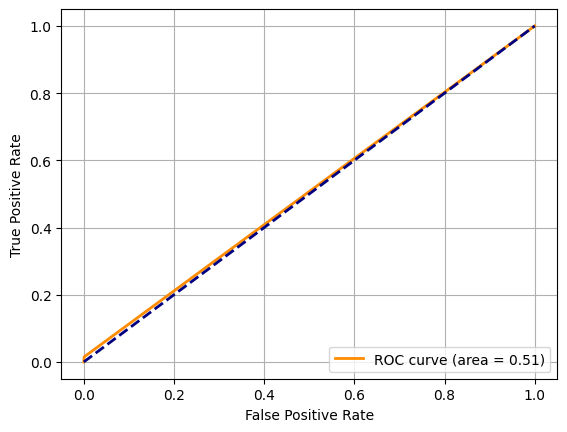

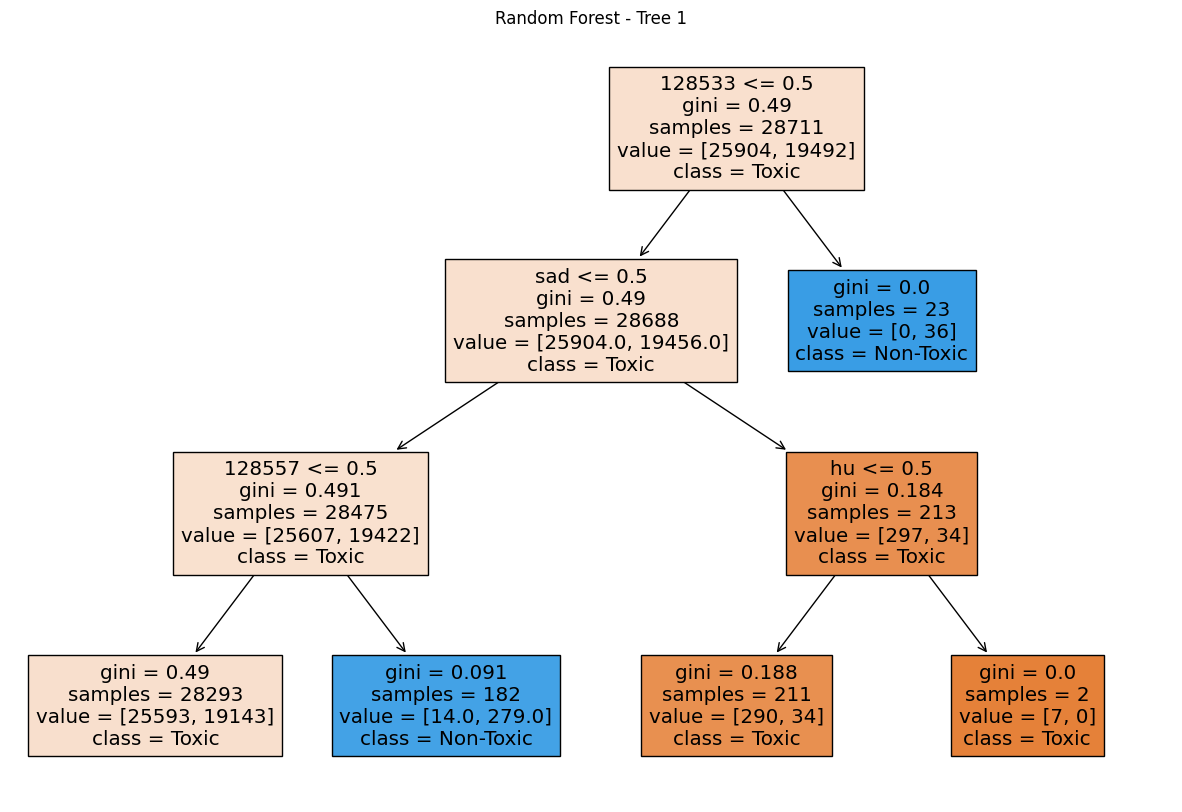

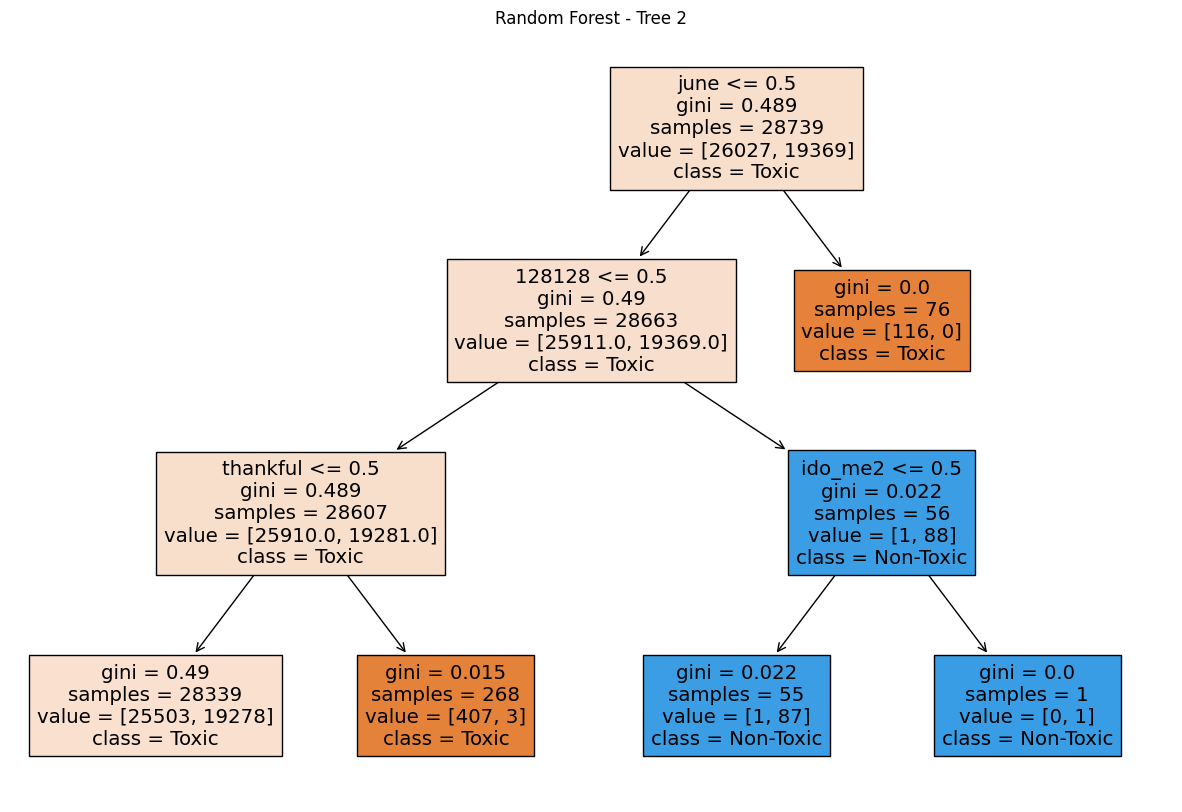

In [81]:
#------------------------------------------------ Random Forest (For bag of words) --------------------------------------------

from sklearn.ensemble import RandomForestClassifier


RFC_model = RandomForestClassifier(n_estimators=2, max_depth=3, random_state=42)
RFC_model.fit(x_train_cv,y_train)

y_pred = RFC_model.predict(x_test_cv)


#------------------------------------------Metrics-------------------------------------------------------

print(classification_report(y_test,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

fpr,tpr,_= roc_curve(y_test,y_pred) 
roc_auc = auc(fpr,tpr)


plt.figure()
plt.plot(fpr, tpr, color = 'darkorange',lw = 2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

for i, Tree in enumerate(RFC_model.estimators_):
    plt.figure(figsize=(15,10))
    plot_tree(Tree, filled=True, 
              feature_names=v.get_feature_names_out(),
              class_names=["Toxic","Non-Toxic"])
    plt.title(f"Random Forest - Tree {i+1}")
    plt.show()




              precision    recall  f1-score   support

           0       0.58      1.00      0.74      6472
           1       0.94      0.06      0.11      4877

    accuracy                           0.59     11349
   macro avg       0.76      0.53      0.43     11349
weighted avg       0.74      0.59      0.47     11349

Confusion Matrix:
[[6453   19]
 [4584  293]]


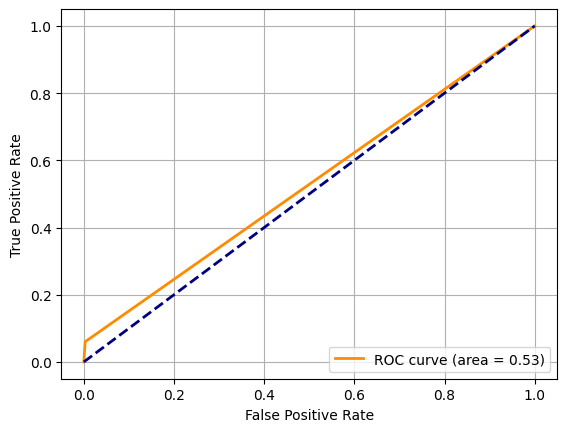

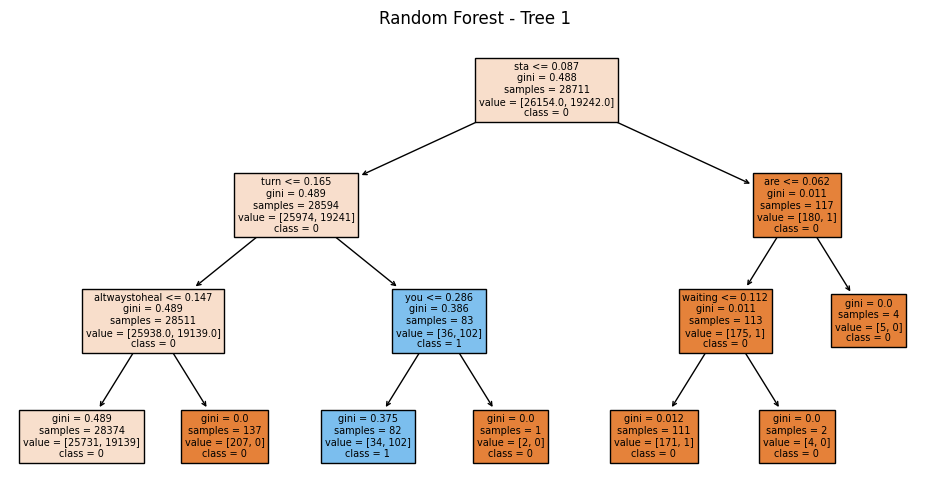

In [82]:
#------------------------------------------------ Random Forest (For TF - IDF) --------------------------------------------

from sklearn.ensemble import RandomForestClassifier


RFC_model = RandomForestClassifier(n_estimators=3, max_depth=3, random_state=42)
RFC_model.fit(x_train_tf,y_train_tdf)

y_pred = RFC_model.predict(x_test_tf)


#------------------------------------------Metrics-------------------------------------------------------

print(classification_report(y_test_tdf,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_tdf, y_pred))

fpr,tpr,_= roc_curve(y_test_tdf,y_pred) 
roc_auc = auc(fpr,tpr)




# Plot ROC Curve for Random Forest
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange',lw = 2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Plot individual tree from Random Forest (modify index as needed)


plt.figure(figsize=(12, 6))
plt.grid(True)
plot_tree(RFC_model.estimators_[0], filled=True, 
          feature_names=TF.get_feature_names_out(),
           class_names=["0", "1"])
plt.title("Random Forest - Tree 1")

plt.show()





              precision    recall  f1-score   support

           0       0.95      0.92      0.93      6561
           1       0.89      0.93      0.91      4788

    accuracy                           0.92     11349
   macro avg       0.92      0.92      0.92     11349
weighted avg       0.92      0.92      0.92     11349

Confusion Matrix:
[[6015  546]
 [ 349 4439]]


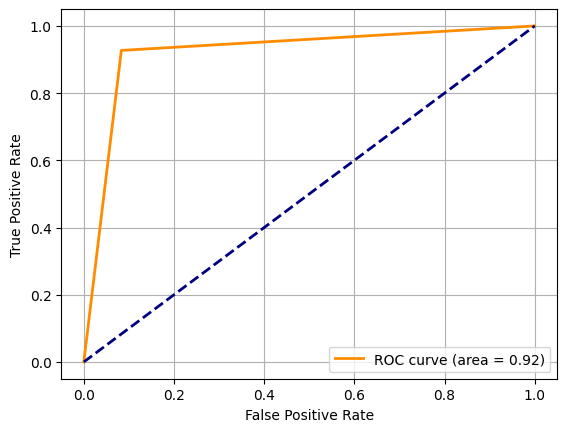

In [83]:
#--------------------------------------Naive Bayes (For bag of words)-------------------------------------------------------------

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train_cv, y_train)

x_test_cv = v.transform(x_test)
y_pred = model.predict(x_test_cv)

#------------------------------------------Metrics-------------------------------------------------------

print(classification_report(y_test,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

fpr,tpr,_= roc_curve(y_test,y_pred) 
roc_auc = auc(fpr,tpr)


plt.figure()
plt.plot(fpr, tpr, color = 'darkorange',lw = 2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


              precision    recall  f1-score   support

           0       0.56      0.94      0.70      6472
           1       0.32      0.04      0.07      4877

    accuracy                           0.55     11349
   macro avg       0.44      0.49      0.39     11349
weighted avg       0.46      0.55      0.43     11349

Confusion Matrix:
[[6064  408]
 [4681  196]]


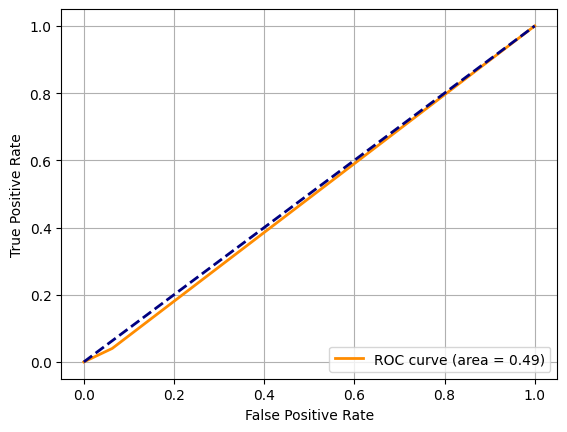

In [84]:
#--------------------------------------Naive Bayes (For TF- IDF)-------------------------------------------------------------

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train_tf, y_train)

y_pred = model.predict(x_test_tf)

#------------------------------------------Metrics-------------------------------------------------------

print(classification_report(y_test_tdf,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_tdf, y_pred))

fpr,tpr,_= roc_curve(y_test_tdf,y_pred) 
roc_auc = auc(fpr,tpr)


plt.figure()
plt.plot(fpr, tpr, color = 'darkorange',lw = 2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      6472
           1       0.84      0.79      0.82      4877

    accuracy                           0.85     11349
   macro avg       0.85      0.84      0.84     11349
weighted avg       0.85      0.85      0.85     11349

Confusion Matrix:
[[5742  730]
 [1005 3872]]


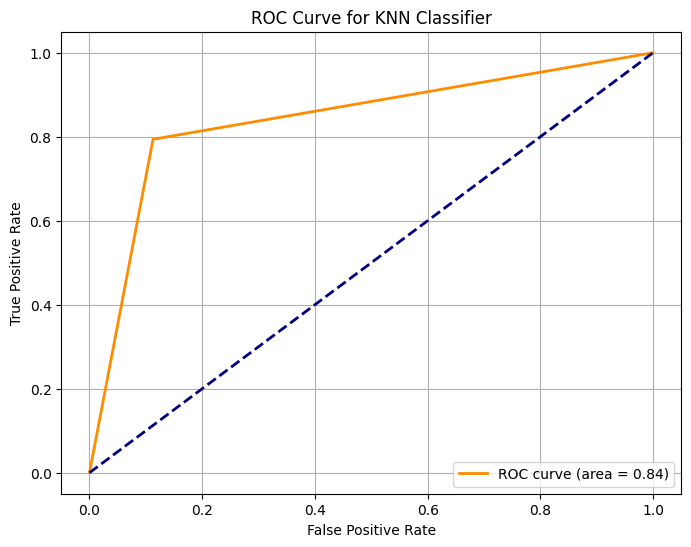

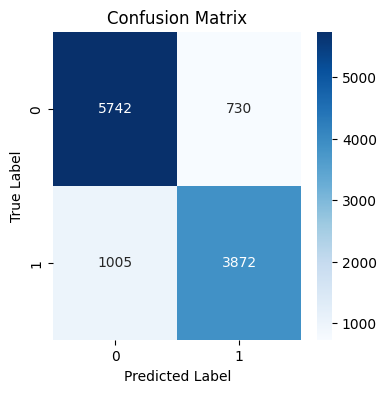

In [89]:
#------------------------------------------------ KNN Classifier (For Bag of Words )  ----------------------------------------------------------------------------------

from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train_cv,y_train)

y_pred = KNN.predict(x_test_cv)


#------------------------------------------Metrics----------------------------------------------------------------------------------

print(classification_report(y_test,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



#----------------------------------------Roc Curve------------------------------------------------------------------------------


fpr,tpr,_= roc_curve(y_test,y_pred) 
roc_auc = auc(fpr,tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.show()




              precision    recall  f1-score   support

           0       0.79      0.94      0.86      6472
           1       0.89      0.66      0.76      4877

    accuracy                           0.82     11349
   macro avg       0.84      0.80      0.81     11349
weighted avg       0.83      0.82      0.82     11349

Confusion Matrix:
[[6087  385]
 [1649 3228]]


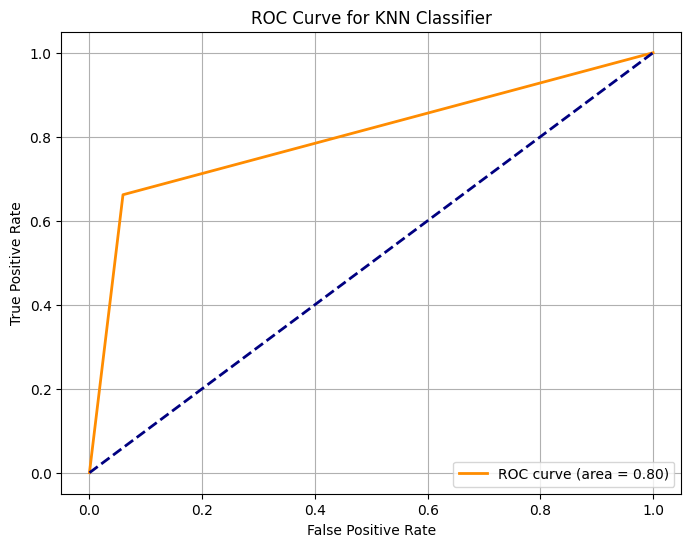

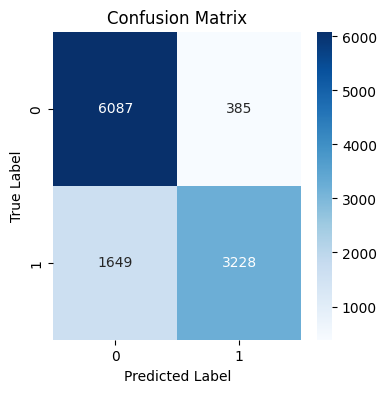

In [85]:
#------------------------------------------------ KNN Classifier (For TF - IDF )  ----------------------------------------------------------------------------------

from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train_tf,y_train_tdf)

y_pred = KNN.predict(x_test_tf)


#------------------------------------------Metrics----------------------------------------------------------------------------------

print(classification_report(y_test_tdf,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_tdf, y_pred))



#----------------------------------------Roc Curve------------------------------------------------------------------------------


fpr,tpr,_= roc_curve(y_test_tdf,y_pred) 
roc_auc = auc(fpr,tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

cm = confusion_matrix(y_test_tdf, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.show()




In [ ]:
#------------------------------------------------ SVM (For TF - IDF )  ----------------------------------------------------------------------------------

from sklearn.svm import SVC
import seaborn as sns

SVM = KNeighborsClassifier(probability=True)
SVM.fit(x_train_tf,y_train_tdf)

y_pred = SVM.predict(x_test_tf)


#------------------------------------------Metrics----------------------------------------------------------------------------------

print(classification_report(y_test_tdf,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_tdf, y_pred))



#----------------------------------------Roc Curve------------------------------------------------------------------------------



fpr,tpr,_= roc_curve(y_test_tdf,y_pred) 
roc_auc = auc(fpr,tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

cm = confusion_matrix(y_test_tdf, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.show()


